In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import sklearn
sklearn.set_config(transform_output="pandas")
from sklearn.utils import compute_sample_weight
#
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
import seaborn as sns


from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import RobustScaler

from sklearn.cluster import KMeans

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC

import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

import optuna

import mlflow

import warnings

warnings.simplefilter('ignore')

import joblib

from joblib import dump, load

import requests

client = mlflow.MlflowClient(tracking_uri="http://127.0.0.1:8082")

mlflow.set_tracking_uri("http://127.0.0.1:8082")

import requests

from sklearn import impute

from sklearn.impute import KNNImputer

from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income_>50K         int64
dtype: object

In [4]:
# Split train and test
X_test, X_train = train_test_split(data, test_size=0.2)
#generating 20% of nulls
X_test['Age'] = np.NaN
X_test['fnlwgt'] = np.NaN
X_test['educational-num'] = np.NaN

X_test

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K,Age
2919,60,Private,NaN,11th,NaN,Married-civ-spouse,Sales,Husband,White,Male,0,1902,70,United-States,1,NaN
12597,52,Private,NaN,HS-grad,NaN,Never-married,Sales,Not-in-family,White,Male,0,1876,50,United-States,0,NaN
13629,62,Private,NaN,Some-college,NaN,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,0,NaN
15809,27,Private,NaN,Assoc-acdm,NaN,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,0,NaN
24018,23,Private,NaN,HS-grad,NaN,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12012,52,Private,NaN,HS-grad,NaN,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,0,NaN
1589,55,Private,NaN,Doctorate,NaN,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,0,NaN
12362,26,Private,NaN,Some-college,NaN,Never-married,Adm-clerical,Other-relative,Asian-Pac-Islander,Male,0,0,60,India,0,NaN
35803,39,Self-emp-not-inc,NaN,10th,NaN,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,0,NaN


In [5]:
data= pd.concat([X_train, X_test])
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K,Age
7567,21,Private,402136.0,Some-college,10.0,Never-married,Exec-managerial,Own-child,White,Female,0,0,20,United-States,0,NaN
558,41,State-gov,70884.0,HS-grad,9.0,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,0,NaN
39576,52,Local-gov,266138.0,Assoc-voc,11.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,35,United-States,0,NaN
8581,38,Private,32086.0,Some-college,10.0,Divorced,Adm-clerical,Own-child,White,Male,0,0,52,United-States,0,NaN
27500,17,NaN,806316.0,11th,7.0,Never-married,NaN,Own-child,White,Female,0,0,20,United-States,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12012,52,Private,NaN,HS-grad,NaN,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,0,NaN
1589,55,Private,NaN,Doctorate,NaN,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,0,NaN
12362,26,Private,NaN,Some-college,NaN,Never-married,Adm-clerical,Other-relative,Asian-Pac-Islander,Male,0,0,60,India,0,NaN
35803,39,Self-emp-not-inc,NaN,10th,NaN,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,0,NaN


In [6]:
y = data['income_>50K']

In [7]:
X = data.drop(['income_>50K'], axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
df_for_sns = pd.concat([X_train,pd.DataFrame(y_train)], axis=1)

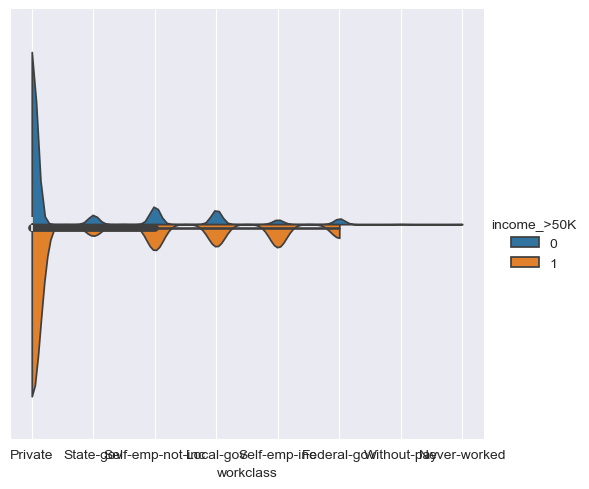

In [10]:
df_for_sns = pd.concat([X_train,pd.DataFrame(y_train)], axis=1)
sns.catplot(
    data=df_for_sns, hue="income_>50K", x="workclass",
    kind="violin", bw_adjust=.5, cut=0, split=True,
)

In [13]:
df_for_sns = pd.concat([X_train,pd.DataFrame(y_train)], axis=1)
df_for_sns

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,Age,income_>50K
15787,35,Private,NaN,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,NaN,1
3896,45,State-gov,NaN,Some-college,NaN,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,NaN,0
19441,49,Private,NaN,HS-grad,NaN,Divorced,Tech-support,Not-in-family,White,Male,4787,0,40,United-States,NaN,1
38749,23,NaN,NaN,Some-college,NaN,Never-married,NaN,Not-in-family,White,Female,0,0,12,United-States,NaN,0
43040,42,Private,256448.0,Some-college,10.0,Never-married,Other-service,Not-in-family,White,Male,0,0,15,United-States,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23627,50,Private,217577.0,HS-grad,9.0,Widowed,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,NaN,0
31942,35,Private,NaN,11th,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,NaN,0
41693,44,Private,NaN,HS-grad,NaN,Never-married,Other-service,Own-child,White,Female,0,0,24,United-States,NaN,0
14224,45,Self-emp-not-inc,NaN,Some-college,NaN,Married-civ-spouse,Sales,Husband,White,Male,0,0,65,United-States,NaN,0


In [14]:
y_train

15787    1
3896     0
19441    1
38749    0
43040    0
        ..
23627    0
31942    0
41693    0
14224    0
32813    0
Name: income_>50K, Length: 30769, dtype: int64

In [15]:
sns.catplot(
    data=X_train, hue="income_>50K", x="workclass",
    kind="violin", bw_adjust=.5, cut=0, split=True, height=14, aspect=20/14
)

ValueError: Could not interpret value `income_>50K` for `hue`. An entry with this name does not appear in `data`.

In [ ]:
data.hist('income_>50K')

In [ ]:
data.dtypes

In [16]:
num_columns = list(X_train.select_dtypes(exclude=['object']).columns)
num_columns

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'Age']

In [26]:
cat_columns = list(X_train.select_dtypes(include=['object']).columns)

In [35]:
numerical = Pipeline(steps=[
    #("KNNImputer", KNNImputer(n_neighbors=5)),
    ("Smote", SMOTE(random_state=42)),
    ("RobustScaler", RobustScaler()),
    ('Scaler', StandardScaler())
])

categorical = Pipeline(steps=[
    ("simple_imputer", SimpleImputer(strategy='constant')),
    ("OneHotEncoder", OneHotEncoder(handle_unknown='ignore', #drop=['first', 'if_binary'],
                                    sparse_output=False))
])

ct = ColumnTransformer([
    ("numerical", numerical, num_columns),
    ("categorical", categorical, cat_columns)
], remainder = 'passthrough')


pipe = Pipeline(steps=[
    ("ct", ct),
    #("XGBClassifier", XGBClassifier())
])

In [36]:
pipe.fit_transform(X_train, y_train)


TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'SMOTE(random_state=42)' (type <class 'imblearn.over_sampling._smote.base.SMOTE'>) doesn't

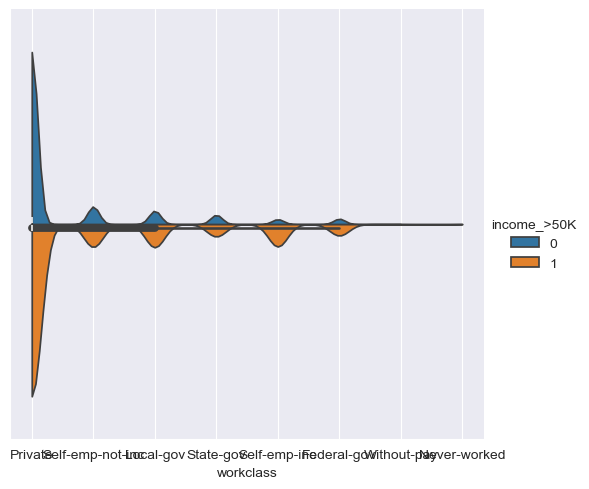

In [29]:
sns.catplot(
    data=X_train, hue="income_>50K", x="workclass",
    kind="violin", bw_adjust=.5, cut=0, split=True,
)

In [9]:
imputer.fit_transform(data.select_dtypes(exclude='object'))

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
16305,24.0,57711.0,14.0,0.0,0.0,35.0,1.0
41065,28.0,69847.0,13.0,0.0,0.0,30.0,0.0
5714,48.0,43206.0,15.0,0.0,0.0,25.0,0.0
3253,20.0,96862.0,10.0,0.0,0.0,8.0,0.0
15360,43.0,142682.0,9.0,0.0,0.0,30.0,0.0
...,...,...,...,...,...,...,...
21479,23.0,254912.0,10.4,0.0,0.0,30.0,0.0
8284,29.0,166958.0,13.2,0.0,0.0,60.0,0.0
11961,50.0,175344.8,9.2,2407.0,0.0,98.0,0.0
8997,18.0,159881.4,8.8,594.0,0.0,15.0,0.0


In [8]:
# filling nulls with knn imputer
imputer = KNNImputer(n_neighbors=5)
data= imputer.fit_transform(data.select_dtypes(exclude='object'))

In [16]:
data

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
16305,24.0,57711.0,14.0,0.0,0.0,35.0,1.0
41065,28.0,69847.0,13.0,0.0,0.0,30.0,0.0
5714,48.0,43206.0,15.0,0.0,0.0,25.0,0.0
3253,20.0,96862.0,10.0,0.0,0.0,8.0,0.0
15360,43.0,142682.0,9.0,0.0,0.0,30.0,0.0
...,...,...,...,...,...,...,...
21479,23.0,254912.0,10.4,0.0,0.0,30.0,0.0
8284,29.0,166958.0,13.2,0.0,0.0,60.0,0.0
11961,50.0,175344.8,9.2,2407.0,0.0,98.0,0.0
8997,18.0,159881.4,8.8,594.0,0.0,15.0,0.0


In [4]:
y = data['income_>50K']

In [5]:
X = data.drop(['income_>50K'], axis=1)

In [6]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3)

In [ ]:
# added SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)